In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
def get_pr_scores(results_file):
    
    results_df = pd.read_csv(results_file, header=None)
    y_pred = results_df[0].values
    y_true = results_df[1].values
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    avg_score = average_precision_score(y_true, y_pred) 
    
    return avg_score, precision, recall, thresholds


def get_auprc(precision, recall):
    # x must be monotonically increasing or decreasing
    return auc(precision, recall)


def get_classwise_accuracy(results_file, threshold=0.5):
    df = pd.read_csv(results_file, header=None)
    pos_df = df.loc[df[1]==1]
    neg_df = df.loc[df[1]==0]
    pos_acc = len(pos_df.loc[pos_df[0]>threshold])/len(pos_df)
    neg_acc = len(neg_df.loc[neg_df[0]<=threshold])/len(neg_df)
    return pos_acc, neg_acc

In [23]:
# GLOBALS
PILOT=False
MODEL_NAME="drcn"

if PILOT:
    suffix = "_pilot"
else:
    suffix = ""

TF="RXRA"
SRC_GENOME="mm10"

In [24]:
source_file = f"../../results/{SRC_GENOME}/{TF}/hybrid{suffix}_src.csv.gz"
target_file = f"../../results/{SRC_GENOME}/{TF}/{MODEL_NAME}{suffix}_tgt.csv.gz"
print(f"The source filepath is {source_file}\nThe target filepath is {target_file}")

The source filepath is ../../results/mm10/RXRA/hybrid_src.csv.gz
The target filepath is ../../results/mm10/RXRA/drcn_tgt.csv.gz


In [5]:
source_metrics = get_pr_scores(source_file)

In [25]:
target_metrics = get_pr_scores(target_file)

In [26]:
# average precision
print(f"The average source precision score is {source_metrics[0]}\nThe average target precision score is {target_metrics[0]}")

The average source precision score is 0.21500585980200262
The average target precision score is 0.13212194724016055


In [27]:
# AUPRC
print(f"The area under the PR curve for source is {get_auprc(source_metrics[2], source_metrics[1])}\nThe area under the PR curve for target is {get_auprc(target_metrics[2], target_metrics[1])}")

The area under the PR curve for source is 0.21497808937065205
The area under the PR curve for target is 0.13210532340764142


The source PR Curve


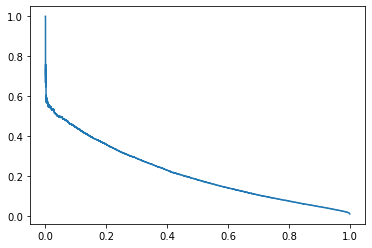

In [28]:
print("The source PR Curve")
plt.plot(source_metrics[2], source_metrics[1]); # xaxis recall, yaxis precision

The target PR Curve


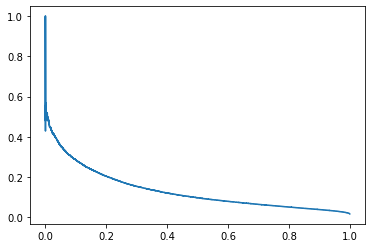

In [29]:
print("The target PR Curve")
plt.plot(target_metrics[2], target_metrics[1]); # xaxis recall, yaxis precision

In [11]:
df_src = pd.read_csv(source_file, header= None)

In [12]:
df_src

,0,1,2,3,4
0,0.004190,0,chr2,3050950,3051450
1,0.003400,0,chr2,3051000,3051500
2,0.006197,0,chr2,3051050,3051550
3,0.006562,0,chr2,3051100,3051600
4,0.007699,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.987238,0,chr2,182012150,182012650
3164247,0.990415,0,chr2,182012200,182012700
3164248,0.988894,0,chr2,182012250,182012750
3164249,0.989871,0,chr2,182012300,182012800


In [26]:
adda_src_file = source_file.replace("drcn", "adda")

In [27]:
df_src_adda = pd.read_csv(adda_src_file, header=None)

In [28]:
df_src_adda

,0,1,2,3,4
0,0.003723,0,chr2,3050950,3051450
1,0.005910,0,chr2,3051000,3051500
2,0.010738,0,chr2,3051050,3051550
3,0.011434,0,chr2,3051100,3051600
4,0.010707,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.009750,0,chr2,182012150,182012650
3164247,0.011198,0,chr2,182012200,182012700
3164248,0.005262,0,chr2,182012250,182012750
3164249,0.004385,0,chr2,182012300,182012800


In [16]:
df_src.loc[~df_src[3].eq(df_src_adda[3])]

,0,1,2,3,4


In [17]:
df_src_adda.loc[~df_src[1].eq(df_src_adda[1])]

,0,1,2,3,4


In [18]:
df_src_adda.equals(df_src)

False

In [19]:
df_src[2].unique()

array(['chr2'], dtype=object)

In [20]:
len(df_src)

3164251

In [21]:
df = pd.read_csv(target_file, header=None)

In [22]:
len(df)

4339180

In [23]:
df

,0,1,2,3,4
0,0.035552,0,chr2,10000,10500
1,0.041173,0,chr2,10050,10550
2,0.042659,0,chr2,10100,10600
3,0.060350,0,chr2,10150,10650
4,0.029139,0,chr2,10200,10700
...,...,...,...,...,...
4339175,0.690603,0,chr2,242107000,242107500
4339176,0.240687,0,chr2,242107050,242107550
4339177,0.541963,0,chr2,242107100,242107600
4339178,0.900081,0,chr2,242107150,242107650


In [24]:
df.loc[df[1]==1]

,0,1,2,3,4
178,0.896671,1,chr2,20100,20600
179,0.969649,1,chr2,20150,20650
180,0.981556,1,chr2,20200,20700
181,0.967872,1,chr2,20250,20750
182,0.958939,1,chr2,20300,20800
...,...,...,...,...,...
4338853,0.983281,1,chr2,242080750,242081250
4338854,0.972038,1,chr2,242080800,242081300
4338855,0.968932,1,chr2,242080850,242081350
4338856,0.963089,1,chr2,242080900,242081400


In [25]:
df.loc[(df[1]==1)&(df[0]>0.8)]

,0,1,2,3,4
178,0.896671,1,chr2,20100,20600
179,0.969649,1,chr2,20150,20650
180,0.981556,1,chr2,20200,20700
181,0.967872,1,chr2,20250,20750
182,0.958939,1,chr2,20300,20800
...,...,...,...,...,...
4338852,0.975175,1,chr2,242080700,242081200
4338853,0.983281,1,chr2,242080750,242081250
4338854,0.972038,1,chr2,242080800,242081300
4338855,0.968932,1,chr2,242080850,242081350


In [26]:
df[2].unique()

array(['chr2'], dtype=object)